# Test the hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

# Web Scraping

Write a code to parse the data on weather in Chicago in November 2017 from the website:
[https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html)
The name of the DataFrame should be weather_records, and it should be specified when you search: attrs={"id": "weather_records"} . Print the DataFrame in its entirety.

In [1]:
import pandas as pd
import requests # Import the library for sending requests to the server
import re
from bs4 import BeautifulSoup # Import the library for webpage parsing

URL = 'https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html'
req=requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')

table = soup.find("table",attrs={"id": "weather_records"})

heading_table = []
for row in table.find_all('th'):
    heading_table.append(row.text)

content=[]
for row in table.find_all('tr'): 
    if not row.find_all('th'): 
        content.append([element.text for element in row.find_all('td')])

weather_records = pd.DataFrame(content, columns = heading_table)
print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


# Step 4. Exploratory data analysis (Python)

## Import the files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import statistics

taxi_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
display(taxi_trips.head(10))
taxi_trips.info()

chicago_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
chicago_trips['average_trips'] = chicago_trips['average_trips'].round(2)
display(chicago_trips.head(10))
chicago_trips.info()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


## Top 10 Neighborhoods for Drop Off's in Chicago:

In [3]:
top_10 = chicago_trips.head(10)
display(top_10)

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


## Taxi Companies VS Number of Rides

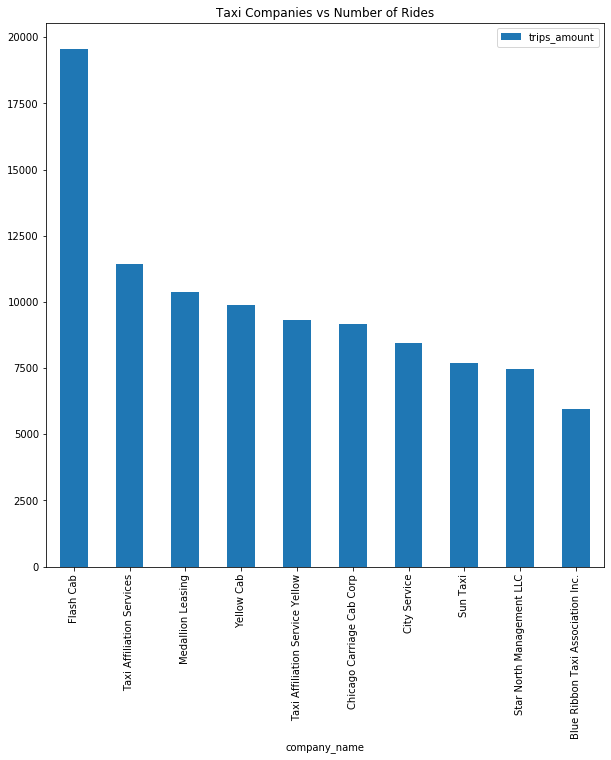

In [4]:
taxi_trips.head(10).plot(x='company_name', y='trips_amount', kind='bar', figsize = (10,10), title='Taxi Companies vs Number of Rides')

### Explanation:
- The top 3 taxi companies base on number of rides for November 15-16, 2017 are the following:
    - Flash Cab
    - Taxi Affiliation Services
    - Medallion Leasing

## Top 10 neighborhoods by Number of Dropoffs

Text(0, 0.5, '# of Rides')

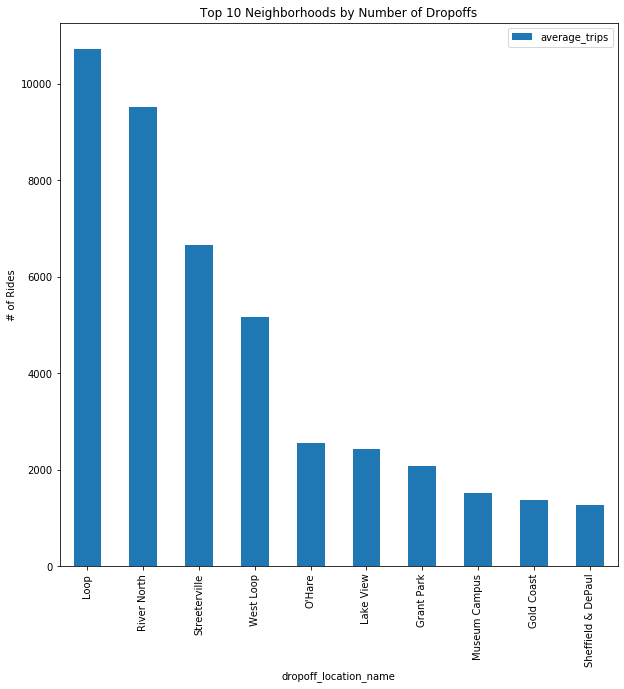

In [5]:
top_10.plot(x='dropoff_location_name', y='average_trips', kind='bar', figsize=(10,10), title='Top 10 Neighborhoods by Number of Dropoffs')
plt.ylabel('# of Rides')

### Explanation:
- Above we can see that in the Loop neighborhood we find the highest average number of drop offs for November 2017.

# Step 5: Testing hypotheses (Python)

In [6]:
loop_to_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')
loop_to_ohare['start_ts'] = pd.to_datetime(loop_to_ohare['start_ts'], format='%Y.%m.%d %H:%M:%S')
loop_to_ohare['duration_seconds'] = loop_to_ohare['duration_seconds'].astype(int)
loop_to_ohare.info()
loop_to_ohare.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null object
duration_seconds      1068 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
5,2017-11-11 04:00:00,Good,1320
6,2017-11-04 16:00:00,Bad,2969
7,2017-11-18 11:00:00,Good,2280
8,2017-11-11 14:00:00,Good,2460
9,2017-11-11 12:00:00,Good,2040


## Test the hypothesis:
- "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

- Null Hypothesis: The average duration of rides on Saturdays is the same for good and bad weather conditions.
- Alt Hypothesis: The average duration of rides on Saturdays is different for good and bad weather conditions.

In [7]:
## Let's make a pivot table. This table is made just to do a quick comparison between
## between weather conditions and average ride durations.

print('Below is a table of the average duration of car rides grouped by weather condition:')
pivot_loop = loop_to_ohare.pivot_table(index='weather_conditions', values='duration_seconds', aggfunc='mean').astype('int')
display(pivot_loop)

good_weather_duration = loop_to_ohare.query('weather_conditions == "Good"')['duration_seconds']
bad_weather_duration = loop_to_ohare.query('weather_conditions == "Bad"')['duration_seconds']

shapiro_test_good_weather = st.shapiro(good_weather_duration)
print('Shapiro test P Value for good weather ride duration:' , shapiro_test_good_weather[1])

shapiro_test_bad_weather = st.shapiro(bad_weather_duration)
print('Shapiro test P Value for bad weather ride duration:' , shapiro_test_bad_weather[1])
print()
print('The p value is less than alpha level .05, thus the null hypothesis is rejected and there is evidence that the data sets tested are not normally distributed.')
print()

print(st.levene(good_weather_duration, bad_weather_duration, center='median'))
print()
print('The p-value of the test is greater than an alpha value of 0.05, hence there is evidence that the sample groups have equal variance.')
print()

results = st.ttest_ind(good_weather_duration, bad_weather_duration, equal_var=True)

alpha = .05

print('Now we will run the ttest using the good_weather_duration and bad_weather_duration: pvalue =', results.pvalue)
print()
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

Below is a table of the average duration of car rides grouped by weather condition:


,duration_seconds
weather_conditions,
Bad,2427
Good,1999


Shapiro test P Value for good weather ride duration: 1.5529984048014178e-22
Shapiro test P Value for bad weather ride duration: 0.0036118649877607822

The p value is less than alpha level .05, thus the null hypothesis is rejected and there is evidence that the data sets tested are not normally distributed.

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

The p-value of the test is greater than an alpha value of 0.05, hence there is evidence that the sample groups have equal variance.

Now we will run the ttest using the good_weather_duration and bad_weather_duration: pvalue = 6.517970327099473e-12

We reject the null hypothesis


### Explanation:
- We reject the null hypothesis. The p-value of the test is less than an alpha value of 0.05, hence there is evidence that the average duration of rides on Saturdays is significantly different for good and bad weather conditions.